In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records" 

Download the data for January and February 2021

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

Read the data for January. How many records are there?

* 1054112
* 1154112
* 1254112
* 1354112   

In [3]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
df["dispatching_base_num"].count()

1154112

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the average trip duration in January?

* 15.16
* 19.16
* 24.16
* 29.16

In [4]:
df["duration"] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df["duration"].mean() # 19.16

19.167224093791006

## Data preparation

Check the distribution of the duration variable. There are some outliners. 

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop? 

/home/nilpath/.pyenv/versions/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

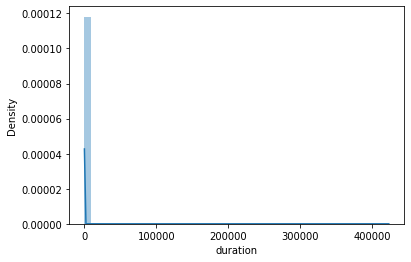

In [5]:
sns.distplot(df.duration)

In [6]:
pre_count = df.duration.count()
df = df[(df.duration >= 1) & (df.duration <= 60)]
pre_count - df.duration.count()

44286

## Q3. Missing values

The features we'll use for our model are the pickup and dropoff location IDs. 

But they have a lot of missing values there. Let's replace them with "-1"

What's the factions of missing values for the pickup location ID? (Or the fraction of "-1"s after you filled the NAs)

* 53%
* 63%
* 73%
* 83%

In [7]:
df.PUlocationID = df.PUlocationID.fillna(-1)
df.DOlocationID = df.DOlocationID.fillna(-1)
(df.PUlocationID == -1).mean()

0.8352732770722617

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix? (The number of columns)

* 2
* 152
* 352
* 525
* 725


In [8]:
categorical = ['PUlocationID', 'DOlocationID']
df[categorical] = df[categorical].astype(str)

train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

X_train.shape

(1109826, 525)

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 5.52
* 10.52
* 15.52
* 20.52

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519389548583

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (Feb 2021). 

What's the RMSE on validation?

* 6.01
* 11.01
* 16.01
* 21.01

In [10]:
df_feb = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')

df_feb["duration"] = df_feb.dropOff_datetime - df_feb.pickup_datetime
df_feb.duration = df_feb.duration.apply(lambda td: td.total_seconds() / 60)
df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]

df_feb[categorical] = df_feb[categorical].astype(str)

eval_dicts = df_feb[categorical].to_dict(orient='records')

X_test = dv.transform(eval_dicts)
y_test = df_feb[target].values

y_pred = lr.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False)

11.364123884894653

## Submit the results

Submit your results here: https://forms.gle/V8q5rv7QRoZ13Sft6

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline

The deadline for submitting is 23 May 2022, 17:00 CET (Monday). After that, the form will be closed.


## Solution

The solution will be put here after the deadline.